In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [3]:
df = pd.read_csv(r'C:\Users\bluecom011\Desktop\1월\4주차\01.15\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
# 한국어로 컬럼명 변경
new_column_names = {'CustomerID': '고객번호',
                    'Gender': '성별',
                    'Age': '나이',
                    'Annual Income (k$)': '연소득',
                    'Spending Score (1-100)': '고객점수'
                    }
df.rename(columns=new_column_names, inplace=True)

In [6]:
df.describe()

,고객번호,나이,연소득,고객점수
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

고객번호     int64
성별      object
나이       int64
연소득      int64
고객점수     int64
dtype: object

결측치 확인

In [8]:
df.isnull().sum()

고객번호    0
성별      0
나이      0
연소득     0
고객점수    0
dtype: int64

데이터 시각화

In [9]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Malgun Gothic'

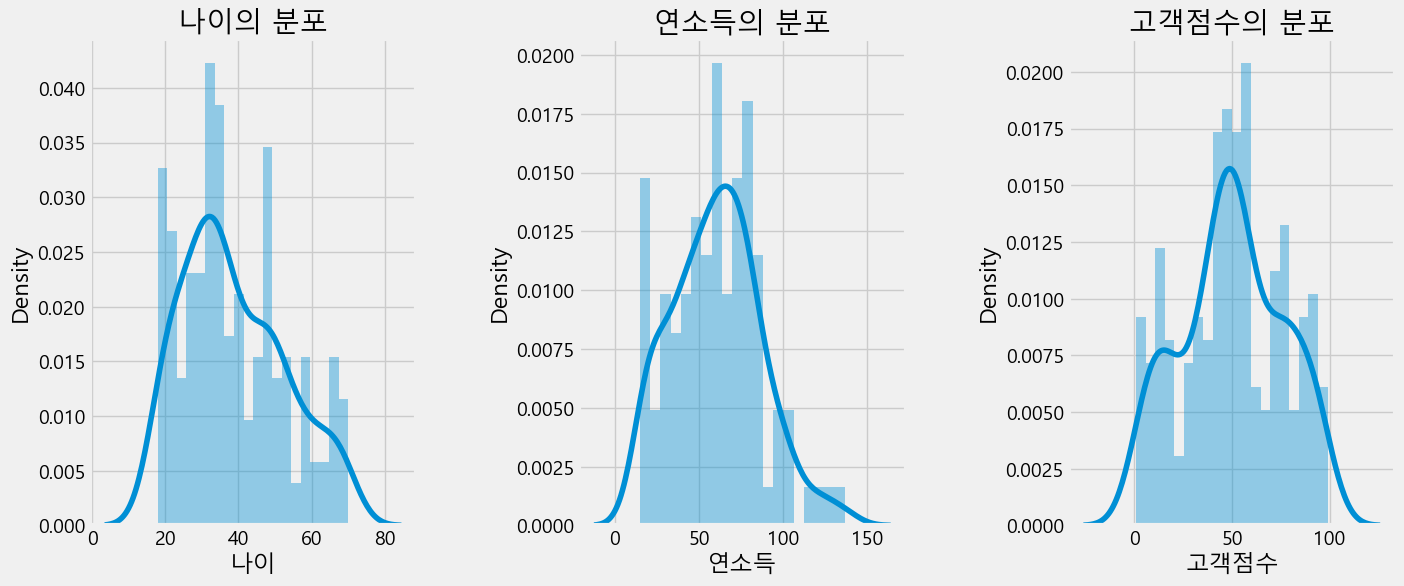

In [10]:
# 한국어 주석 예제

# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 6))

# 변수 n을 초기화합니다.
n = 0

# 세 개의 서브플롯을 생성합니다. 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' 각각에 대한 분포를 보여줍니다.
for x in ['나이' , '연소득' , '고객점수']:
    # n을 증가시킵니다.
    n += 1
    
    # 1행 3열의 서브플롯 중 현재 위치를 지정합니다.
    plt.subplot(1, 3, n)
    
    # 서브플롯 간의 간격을 조절합니다.
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # seaborn 라이브러리를 사용하여 히스토그램을 그립니다. bins는 막대의 개수를 지정합니다.
    sns.distplot(df[x], bins=20)
    
    # 그래프의 제목을 지정합니다.
    plt.title('{}의 분포'.format(x))

# 그래프를 출력합니다.
plt.show()


Count Plot of Gender

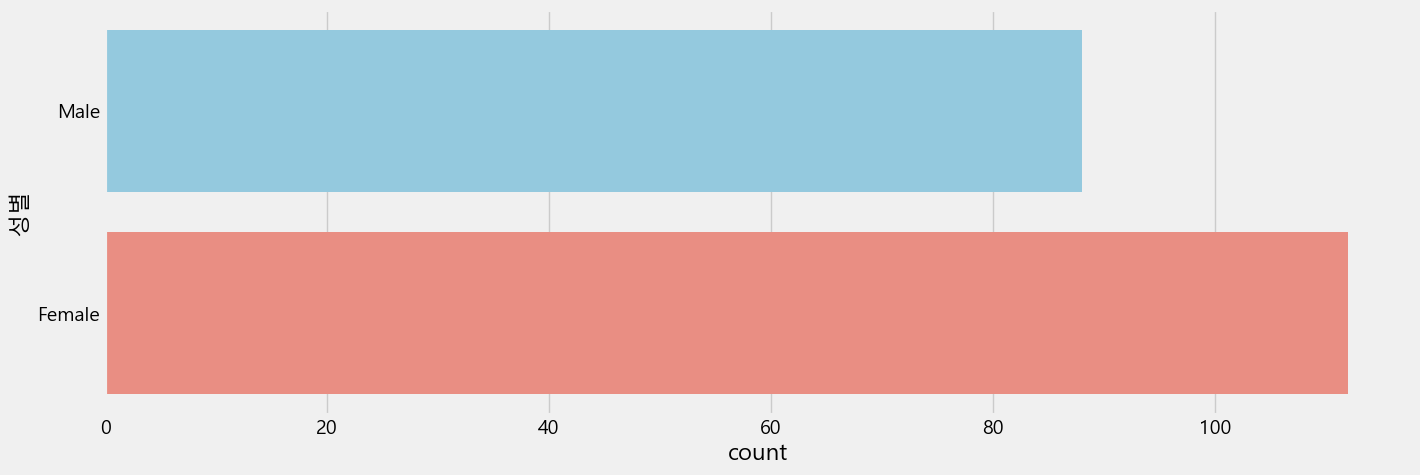

In [11]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 5))

# seaborn의 countplot을 사용하여 성별에 따른 막대 그래프를 그립니다.
# palette 매개변수를 사용하여 두 가지 색상을 지정합니다.
sns.countplot(y='성별', data=df, palette=['skyblue', 'salmon'])

# 그래프를 출력합니다.
plt.show()


연령, 연소득, 지출 점수 간의 관계 도표화

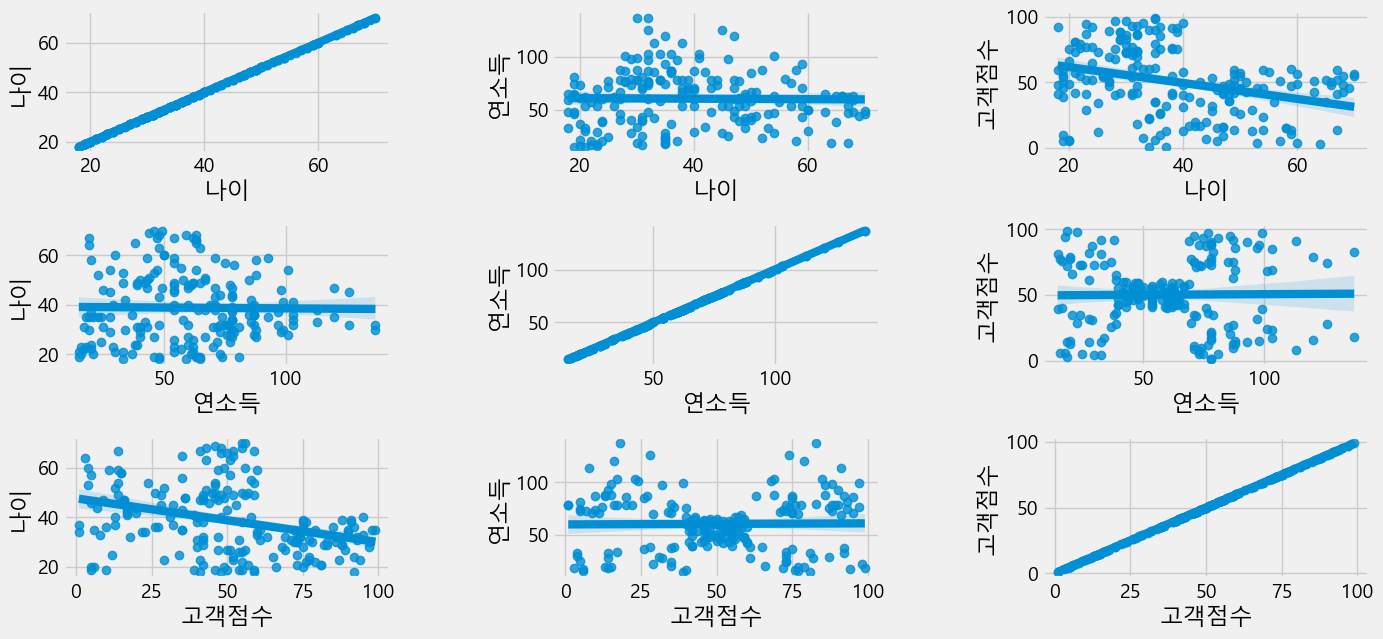

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['나이' , '연소득' , '고객점수']:
    for y in ['나이' , '연소득' , '고객점수']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

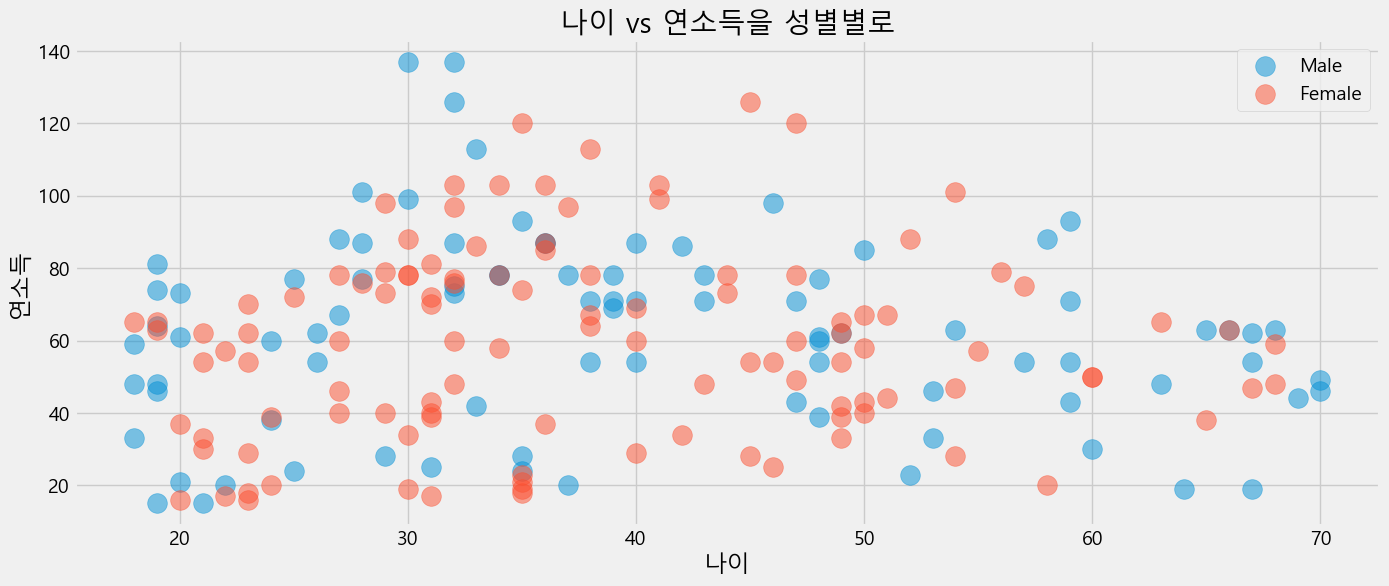

In [13]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 6))

# 성별별로 산점도를 그립니다.
for gender in ['남성', '여성']:
    # 남성 또는 여성에 해당하는 데이터만 선택하여 산점도를 그립니다.
    plt.scatter(x='나이', y='연소득', data=df[df['성별'] == gender],
                s=200, alpha=0.5, label=gender)

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('나이'), plt.ylabel('연소득') 

# 그래프의 제목을 지정합니다.
plt.title('나이 vs 연소득을 성별별로')

# 범례를 추가합니다.
plt.legend()

# 그래프를 출력합니다.
plt.show()


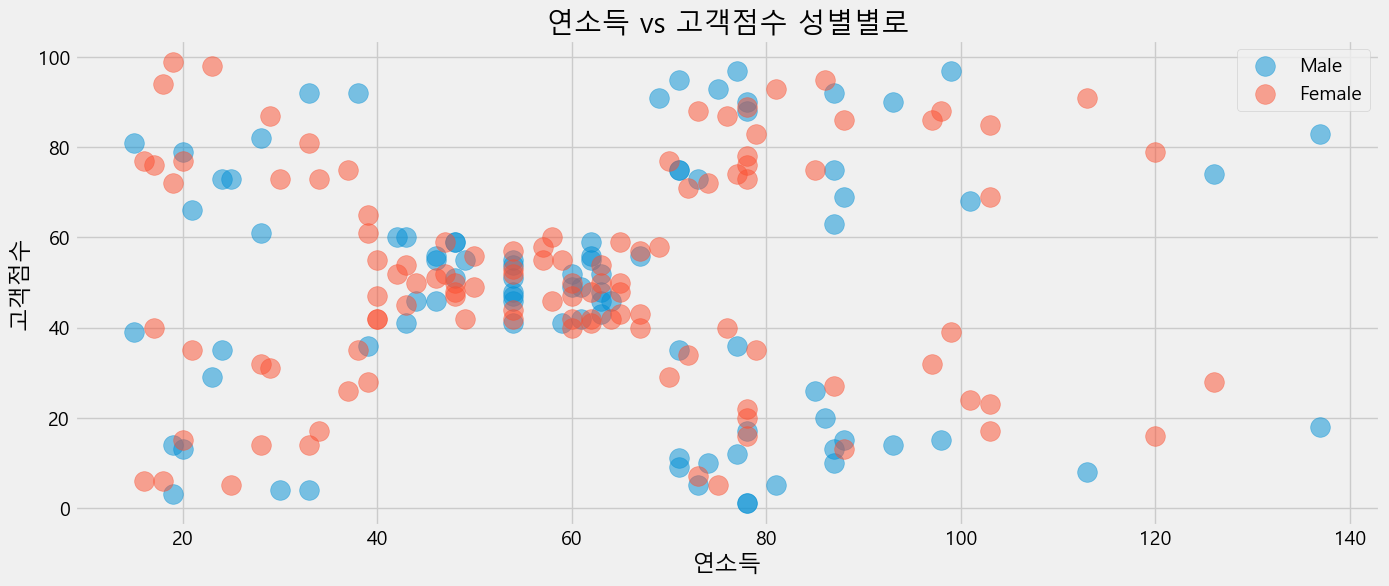

In [14]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 6))

# 성별별로 산점도를 그립니다.
for gender in ['남성', '여성']:
    # 남성 또는 여성에 해당하는 데이터만 선택하여 산점도를 그립니다.
    plt.scatter(x='연소득', y='고객점수', data=df[df['성별'] == gender],
                s=200, alpha=0.5, label=gender)

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('연소득'), plt.ylabel('고객점수') 

# 그래프의 제목을 지정합니다.
plt.title('연소득 vs 고객점수 성별별로')

# 범례를 추가합니다.
plt.legend()

# 그래프를 출력합니다.
plt.show()


성별에 따른 연령, 연소득, 지출점수의 가치분포

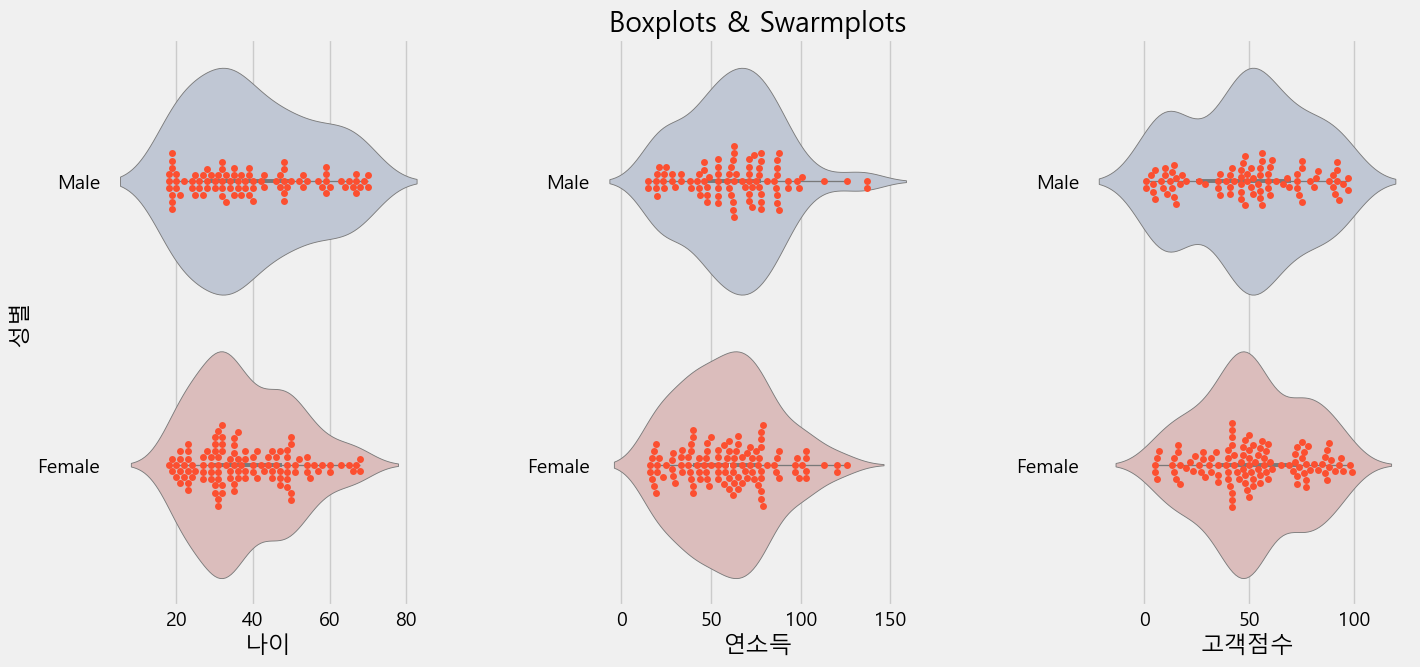

In [16]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 7))

# 변수 n을 초기화합니다.
n = 0

# '나이', '연소득', '고객점수'에 대한 violin plot과 swarm plot을 그립니다.
for cols in ['나이', '연소득', '고객점수']:
    # n을 증가시킵니다.
    n += 1 
    
    # 1행 3열의 서브플롯 중 현재 위치를 지정합니다.
    plt.subplot(1, 3, n)
    
    # 서브플롯 간의 간격을 조절합니다.
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # seaborn 라이브러리를 사용하여 violin plot을 그립니다.
    sns.violinplot(x=cols, y='성별', data=df, palette='vlag')
    
    # seaborn 라이브러리를 사용하여 swarm plot을 그립니다.
    sns.swarmplot(x=cols, y='성별', data=df)
    
    # 첫 번째 그래프에서만 y축에 '성별' 라벨을 추가합니다.
    plt.ylabel('성별' if n == 1 else '')
    
    # 두 번째 그래프에서만 제목을 추가합니다.
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

# 그래프를 출력합니다.
plt.show()


Clustering using K- means

In [17]:
# 연령과 지출 점수를 이용한 세분화를 위한 데이터를 선택합니다.
X1 = df[['나이', '고객점수']].iloc[:, :].values

# 군집 개수에 따른 inertia(클러스터 내 제곱 거리의 합)를 저장할 리스트를 초기화합니다.
inertia = []

# 군집 개수를 1부터 10까지 변경하면서 K-평균 알고리즘을 적용합니다.
for n in range(1, 11):
    # KMeans 모델을 생성합니다.
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    
    # 모델을 데이터에 적합시킵니다.
    algorithm.fit(X1)
    
    # 각 군집 개수에 대한 inertia를 리스트에 추가합니다.
    inertia.append(algorithm.inertia_)


관성을 기반으로 N 클러스터 선택(중심과 데이터 포인트 사이의 제곱 거리가 작아야 함)

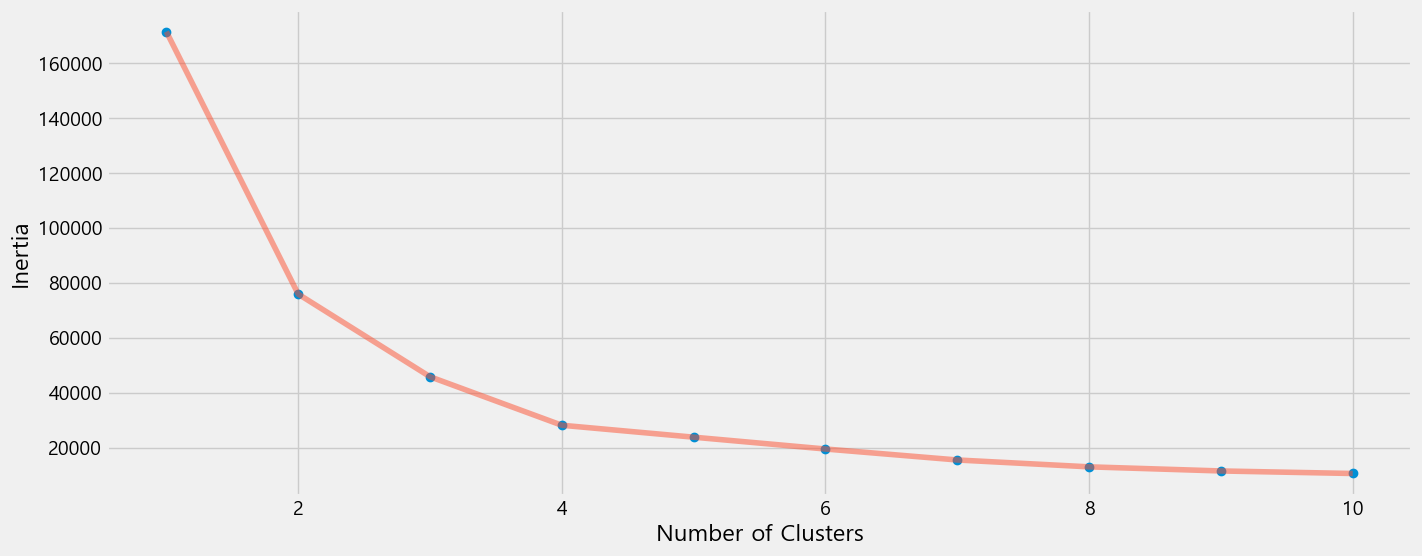

In [18]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 6))

# 군집 개수에 따른 inertia 값을 선 그래프로 그립니다.
plt.plot(np.arange(1, 11), inertia, 'o', label='Inertia values')

# 직선 형태의 선 그래프를 추가합니다.
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')

# 그래프를 출력합니다.
plt.show()


In [19]:
# KMeans 모델을 생성합니다.
algorithm = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, 
                   tol=0.0001, random_state=111, algorithm='elkan')

# 모델을 데이터에 적합시킵니다.
algorithm.fit(X1)

# 각 데이터 포인트에 대한 군집 레이블을 얻습니다.
labels1 = algorithm.labels_

# 군집 중심을 얻습니다.
centroids1 = algorithm.cluster_centers_


In [20]:
# h는 메시 그리드의 간격을 나타냅니다.
h = 0.02

# x와 y 축의 최소 및 최대 값을 정의합니다.
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

# 메시 그리드를 생성합니다.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메시 그리드 상의 각 점에 대해 군집을 예측합니다.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])


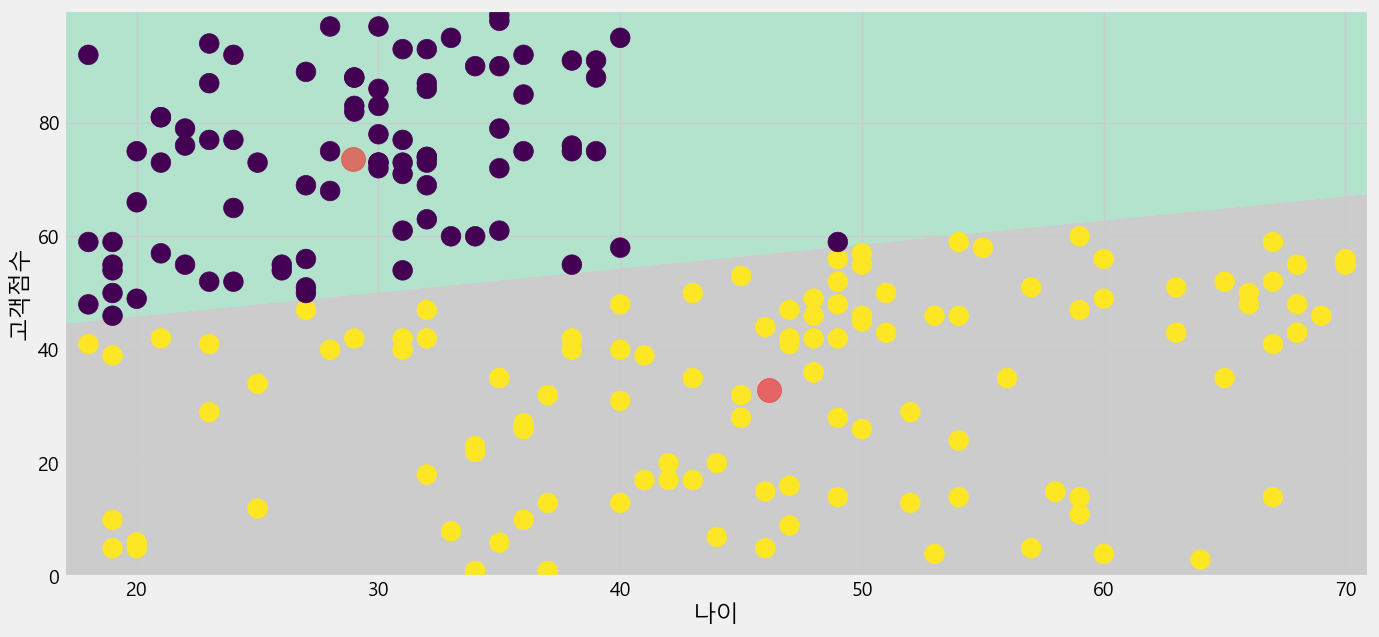

In [21]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 7))

# 그래프를 초기화합니다.
plt.clf()

# 군집 예측 결과(Z)를 원래 모양으로 변형합니다.
Z = Z.reshape(xx.shape)

# imshow를 사용하여 군집 경계를 그립니다.
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# 산점도를 그립니다. c는 군집 레이블에 따른 색상을 지정합니다.
plt.scatter(x='나이', y='고객점수', data=df, c=labels1, s=200)

# 군집 중심점을 빨간색으로 강조하여 표시합니다.
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

# x축과 y축에 라벨을 추가합니다.
plt.ylabel('고객점수'), plt.xlabel('나이')

# 그래프를 출력합니다.
plt.show()


In [22]:
# 연소득과 지출 점수를 이용한 세분화를 위한 데이터를 선택합니다.
X2 = df[['연소득', '고객점수']].iloc[:, :].values

# 군집 개수에 따른 inertia(클러스터 내 제곱 거리의 합)를 저장할 리스트를 초기화합니다.
inertia = []

# 군집 개수를 1부터 10까지 변경하면서 K-평균 알고리즘을 적용합니다.
for n in range(1, 11):
    # KMeans 모델을 생성합니다.
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    
    # 모델을 데이터에 적합시킵니다.
    algorithm.fit(X2)
    
    # 각 군집 개수에 대한 inertia를 리스트에 추가합니다.
    inertia.append(algorithm.inertia_)


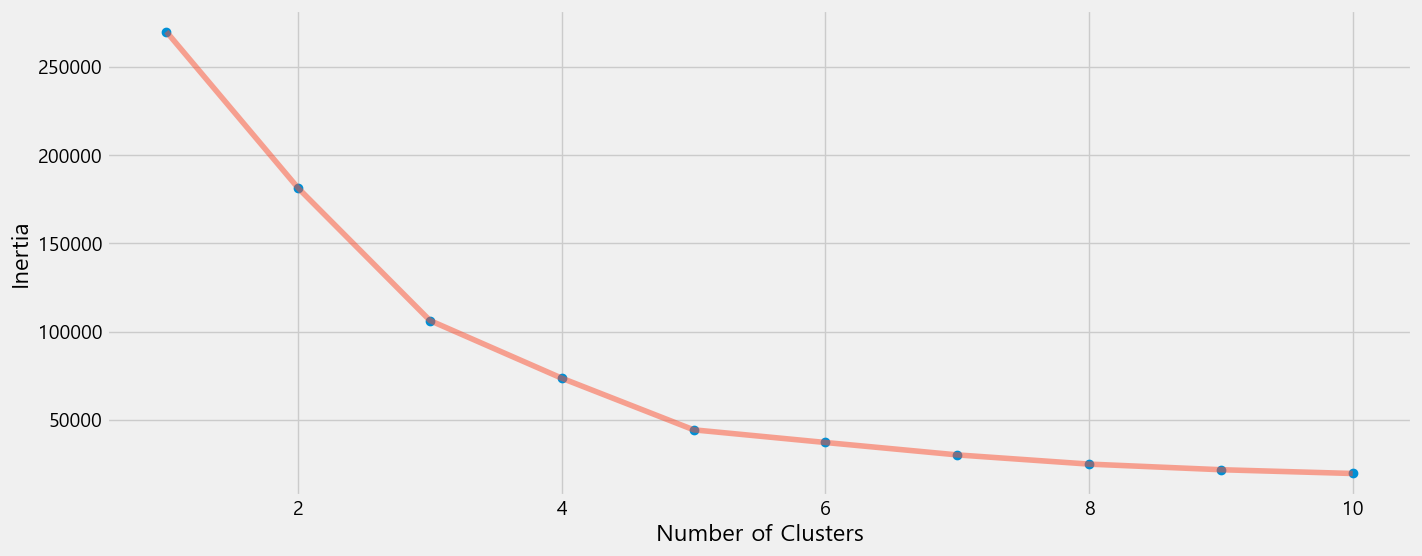

In [23]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 6))

# 군집 개수에 따른 inertia 값을 선 그래프로 그립니다.
plt.plot(np.arange(1, 11), inertia, 'o', label='Inertia values')

# 직선 형태의 선 그래프를 추가합니다.
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')

# 그래프를 출력합니다.
plt.show()


In [24]:
# KMeans 모델을 생성합니다.
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, 
                   tol=0.0001, random_state=111, algorithm='elkan')

# 모델을 데이터에 적합시킵니다.
algorithm.fit(X2)

# 각 데이터 포인트에 대한 군집 레이블을 얻습니다.
labels2 = algorithm.labels_

# 군집 중심을 얻습니다.
centroids2 = algorithm.cluster_centers_


In [25]:
# h는 메시 그리드의 간격을 나타냅니다.
h = 0.02

# x와 y 축의 최소 및 최대 값을 정의합니다.
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

# 메시 그리드를 생성합니다.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메시 그리드 상의 각 점에 대해 군집을 예측합니다.
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])


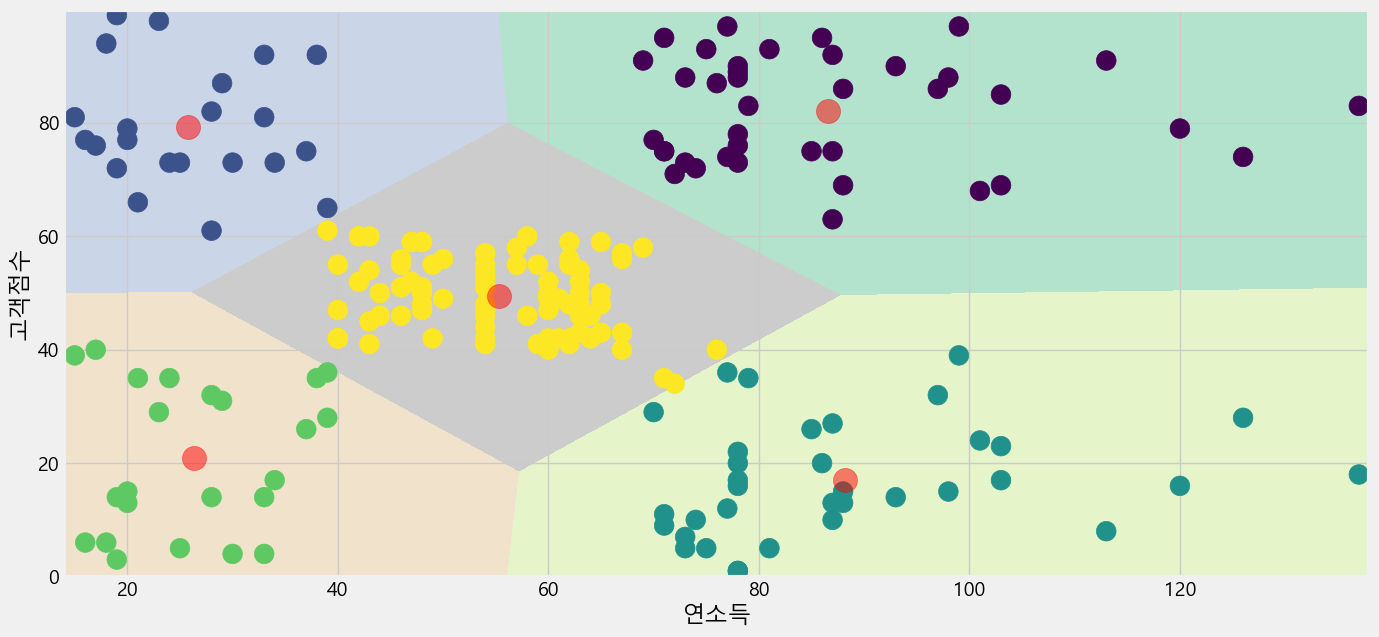

In [31]:
# 그래프를 생성합니다. figsize는 그래프의 크기를 지정합니다.
plt.figure(1, figsize=(15, 7))

# 그래프를 초기화합니다.
plt.clf()

# 군집 예측 결과(Z2)를 원래 모양으로 변형합니다.
Z2 = Z2.reshape(xx.shape)

# imshow를 사용하여 군집 경계를 그립니다.
plt.imshow(Z2, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# 산점도를 그립니다. c는 군집 레이블에 따른 색상을 지정합니다.
plt.scatter(x='연소득', y='고객점수', data=df, c=labels2, s=200)

# 군집 중심점을 빨간색으로 강조하여 표시합니다.
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1], s=300, c='red', alpha=0.5)

# x축과 y축에 라벨을 추가합니다.
plt.ylabel('고객점수'), plt.xlabel('연소득')

# 그래프를 출력합니다.
plt.show()


In [27]:
# 연령, 연소득, 지출점수를 이용한 세분화를 위한 데이터를 선택합니다.
X3 = df[['나이', '연소득', '고객점수']].iloc[:, :].values

# 군집 개수에 따른 inertia(클러스터 내 제곱 거리의 합)를 저장할 리스트를 초기화합니다.
inertia = []

# 군집 개수를 1부터 10까지 변경하면서 K-평균 알고리즘을 적용합니다.
for n in range(1, 11):
    # KMeans 모델을 생성합니다.
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, random_state=111, algorithm='elkan')
    
    # 모델을 데이터에 적합시킵니다.
    algorithm.fit(X3)
    
    # 각 군집 개수에 대한 inertia를 리스트에 추가합니다.
    inertia.append(algorithm.inertia_)


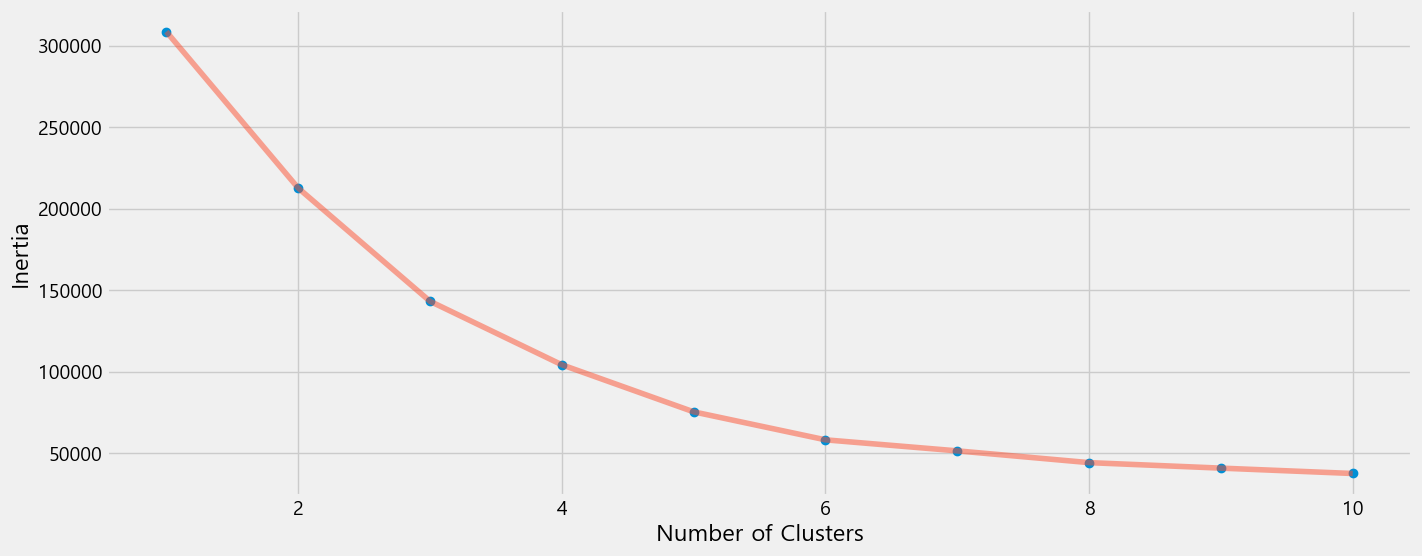

In [28]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [29]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

3D 산점도

In [32]:
import plotly.graph_objs as go
import plotly.offline as py

# 데이터프레임에 'label3' 열을 추가합니다.
df['label3'] = labels3

# 3D 산점도를 생성하기 위한 데이터를 정의합니다.
trace1 = go.Scatter3d(
    x=df['나이'],
    y=df['고객점수'],
    z=df['연소득'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)

# 데이터를 리스트로 묶습니다.
data = [trace1]

# 레이아웃을 정의합니다.
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='나이'),
        yaxis=dict(title='고객점수'),
        zaxis=dict(title='연소득')
    )
)

# Figure 객체를 생성합니다.
fig = go.Figure(data=data, layout=layout)

# 3D 산점도를 출력합니다.
py.offline.iplot(fig)
